### Grocery Store Customer Analysis

### Project Goal:
Find trends/associations in customer groups and purchased items. This can be used to target promotions towards customers and arrange the items in the store. Ultimately using this to increase sales for each customer.

### Questions:


1.   What items are frequently purchased together? Does the purchase of one item lead to another purchase?
2.   How can customers be grouped based on their purchases? How can these groups be targeted with ads?

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# Load cat_counts.csv (gets number of items in each category bought by in each transaction)
cat_counts = pd.read_csv("cat_counts.csv")
cat_counts.head()

,alcoholic beverages,baby,bakery,baking/cooking,beverages,breakfast,candy,cleaning product,condiments,cosmetics/first aid,dairy,fruit/vegetables,houseware,meat,other,pets,ready made meals,snacks
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
# Load transactions series data
transactions = pd.read_pickle("transactions_clean.pkl")
transactions.head()

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[yogurt, meat spreads, pip fruit, cream cheese]"
4,"[other vegetables, whole milk, condensed milk,..."


In [ ]:
# One hot encode transactions - needed for a priori analysis
transactions_list = transactions.tolist()
te = TransactionEncoder()
te_array = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# find frequent item sets, this will get itme sets that occur in 1% of transactions
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 560


In [ ]:
# calculates rules, support, confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

Association Rules: 932


,antecedents,consequents,support,confidence,lift
0,(baking powder),(other vegetables),0.010270,0.418605,1.661856
1,(baking powder),(whole milk),0.012980,0.529070,1.669356
2,(beef),(citrus fruit),0.011839,0.172557,1.547057
3,(citrus fruit),(beef),0.011839,0.106138,1.547057
4,(beef),(other vegetables),0.027386,0.399168,1.584694


In [ ]:
# choose support, confidence, and lift to have a reasonable number of rules
rules_filtered = rules[(rules['support'] >= 0.01) & (rules['confidence'] >= 0.3) & (rules['lift'] > 2)]
print(len(rules_filtered))
rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

37


,antecedents,consequents,support,confidence,lift
9,(beef),(root vegetables),0.023820,0.347193,2.367872
367,(onions),(root vegetables),0.013265,0.312081,2.128401
536,"(beef, other vegetables)",(root vegetables),0.011125,0.406250,2.770641
544,"(whole milk, beef)",(root vegetables),0.011268,0.377990,2.577909
588,"(whole milk, butter)",(root vegetables),0.011553,0.301115,2.053618


Support: Frequency of appearance of rule.

Confidence: Probability of buying item B if item A is bought.

Lift: Is the rule better than random chance (>1 means it's a good rule)

In [ ]:
# find the 25 best rules by lift
rules_filtered.sort_values(by='lift', inplace=True)
rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(25)

/tmp/ipython-input-3237467508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered.sort_values(by='lift', inplace=True)


,antecedents,consequents,support,confidence,lift
715,"(root vegetables, rolls/buns)",(other vegetables),0.017116,0.504202,2.001675
852,"(tropical fruit, rolls/buns)",(yogurt),0.012266,0.361345,2.004262
923,"(whole milk, yogurt, tropical fruit)",(other vegetables),0.010697,0.506757,2.011819
589,"(root vegetables, butter)",(whole milk),0.011553,0.637795,2.012413
593,"(yogurt, butter)",(whole milk),0.013122,0.638889,2.015864
904,"(tropical fruit, whole milk)",(yogurt),0.021110,0.363636,2.016974
639,"(domestic eggs, root vegetables)",(other vegetables),0.010270,0.514286,2.041708
877,"(whipped/sour cream, whole milk)",(root vegetables),0.013265,0.300000,2.046012
752,"(yogurt, other vegetables)",(root vegetables),0.017972,0.300716,2.050895
742,"(whipped/sour cream, other vegetables)",(root vegetables),0.011981,0.301075,2.053345


While confidence measures the likelihood of a consequent given an antecedent, it can be inflated for frequently purchased items. Support can also be inflated by frequently purchased items becuase an item that is present in many transactions will have a high support. Lift normalizes this effect by comparing rule confidence to the baseline item frequency, making it a more reliable indicator of meaningful associations.

In [ ]:
# apply rules to the data frame (write them in easily understood terms)
rules['rule'] = rules.apply(lambda x: f"{set(x['antecedents'])} -> {set(x['consequents'])}",axis=1)
rules_filtered['rule'] = rules_filtered.apply(lambda x: f"{set(x['antecedents'])} -> {set(x['consequents'])}",axis=1)

This section validates the rules. It randomly samples the transactions and only selects rules that occur in > 7 runs, which validates that the rules are not random chance.

In [ ]:
# runs apriori analysis on random samples of 80% of the data, runs 10 scenarios
stable_counts = {}

n_runs = 10
sample_frac = 0.8

for _ in range(n_runs):
    sample = df_encoded.sample(frac=sample_frac, replace=False)

    freq = apriori(sample, min_support=0.01, use_colnames=True)
    r = association_rules(freq, metric="lift", min_threshold=1.2)

    r['rule'] = r.apply(lambda x: f"{set(x['antecedents'])} -> {set(x['consequents'])}",axis=1)

    for rule in r['rule']:
        stable_counts[rule] = stable_counts.get(rule, 0) + 1


In [ ]:
# takes the rules that appear in >= 70% of runs
stability_df = (pd.DataFrame.from_dict(stable_counts, orient='index', columns=['count']).reset_index().rename(columns={'index': 'rule'}))
stable_rules = stability_df[stability_df['count'] >= 7]
stable_rules.sort_values('count', ascending=False).head(25)


,rule,count
993,"{'yogurt'} -> {'whole milk', 'whipped/sour cre...",10
992,"{'whipped/sour cream'} -> {'whole milk', 'yogu...",10
991,"{'whole milk'} -> {'whipped/sour cream', 'yogu...",10
990,"{'whipped/sour cream', 'yogurt'} -> {'whole mi...",10
989,"{'whole milk', 'yogurt'} -> {'whipped/sour cre...",10
988,"{'whole milk', 'whipped/sour cream'} -> {'yogu...",10
987,"{'yogurt'} -> {'whole milk', 'tropical fruit'}",10
986,"{'tropical fruit'} -> {'whole milk', 'yogurt'}",10
985,"{'whole milk'} -> {'tropical fruit', 'yogurt'}",10
984,"{'tropical fruit', 'yogurt'} -> {'whole milk'}",10


In [ ]:
# Filter previously calculated rules by stable rules
final_rules = rules_filtered.merge(stable_rules[['rule']],on='rule',how='inner')

In [ ]:
final_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift')

,antecedents,consequents,support,confidence,lift
0,"(root vegetables, rolls/buns)",(other vegetables),0.017116,0.504202,2.001675
1,"(rolls/buns, tropical fruit)",(yogurt),0.012266,0.361345,2.004262
2,"(whole milk, tropical fruit, yogurt)",(other vegetables),0.010697,0.506757,2.011819
3,"(root vegetables, butter)",(whole milk),0.011553,0.637795,2.012413
4,"(butter, yogurt)",(whole milk),0.013122,0.638889,2.015864
5,"(whole milk, tropical fruit)",(yogurt),0.021110,0.363636,2.016974
6,"(whole milk, whipped/sour cream)",(root vegetables),0.013265,0.300000,2.046012
7,"(other vegetables, yogurt)",(root vegetables),0.017972,0.300716,2.050895
8,"(other vegetables, whipped/sour cream)",(root vegetables),0.011981,0.301075,2.053345
9,"(whole milk, butter)",(root vegetables),0.011553,0.301115,2.053618


There is consistent co purchasing between produce and dairy products (especially vegetables, milk, yogurt, and fruit.

**Rule associations:**

(root vegetables, rolls/buns) → (other vegetables)
*   support = 1.7%
*   confidence = 50%
*   lift = 2.00

Customers who buy root vegetables and rolls/buns are twice as likely to also buy other vegetables compared to an average shopper. While the combination occurs in only ~1.7% of transactions, when it does occur, it strongly predicts additional vegetable purchases.


(rolls/buns, tropical fruit) →	(yogurt)
*   support = 1.2%
*   confidence = 36.1%
*   lift = 2.00

Customers who buy rolls and tropical fruit are also twice as likely to buy yogurt. This also strongly associates these products, even though it only occurs in 1.2% of purchases




**Patterns**


1.   Vegetable Patterns

(root vegetables, X) → (other vegetables)

(other vegetables, X) → (root vegetables)

Vegetable purchases are often not purchased singularly. This indicates that customers who buy one form of produce often buy another form of produce. This suggests that this customer pool favors meal planning over impulse buying


2.   Dairy Patterns

(butter, yogurt) → whole milk

(whole milk, curd) → yogurt

(whole milk, tropical fruit) → yogurt

Dairy items frequently co-occur (act as an anchor to the basket) and often connect fresh produce to the rest of the basket, This indicates that many multi product shopping trips include dairy or produce.


3.   Health Patterns

(root vegetables, tropical fruit) → yogurt

lift ≈ 2.14

The strong association between fruit and yogurt suggests breakfast- or health oriented baskets.

**Recommendations**



1.   Promotions can be made for discounts on fruits/vegatables if they are bundled together. For example, if the store is trying to sell more tomatos, they could promote a discount if you buy cucumbers and tomatos
2.   Dairy and produce sections could be put on opposity ends of the store. Since these are "anchor products" and people will often buy both, they will have to walk through the whole store to get both of them. This means that they will see more products and be more inclined to pick up additional items.
3.   Promotions can be made for other healthy breakfast foods to people that have these in their basket. For example, you can promote items like oatmeal or tea



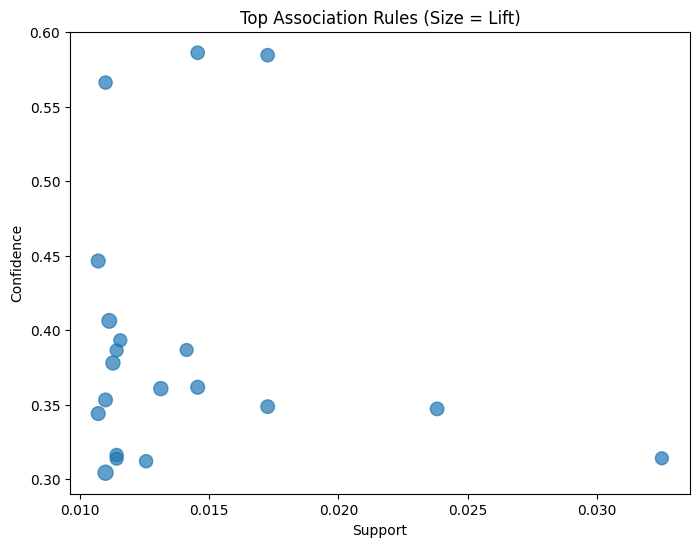

In [ ]:
import matplotlib.pyplot as plt

top_rules = final_rules.sort_values('lift', ascending=False).head(20)

plt.figure(figsize=(8, 6))
plt.scatter(
    top_rules['support'],
    top_rules['confidence'],
    s=top_rules['lift'] * 40,
    alpha=0.7
)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Top Association Rules (Size = Lift)")
plt.show()


This graph shows Confidence vs Support vs Lift. This shows that good rules don't necessarily have high confidence and support (most likely because they do not appear in a lot of transactions)